In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

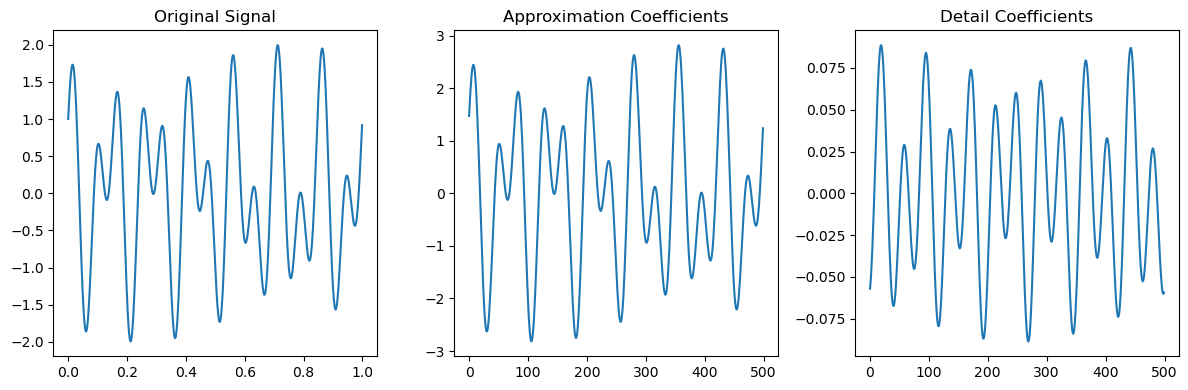

In [2]:
# Generate the signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(signal, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.tight_layout()
plt.show()

c:\Users\cypri\anaconda3\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


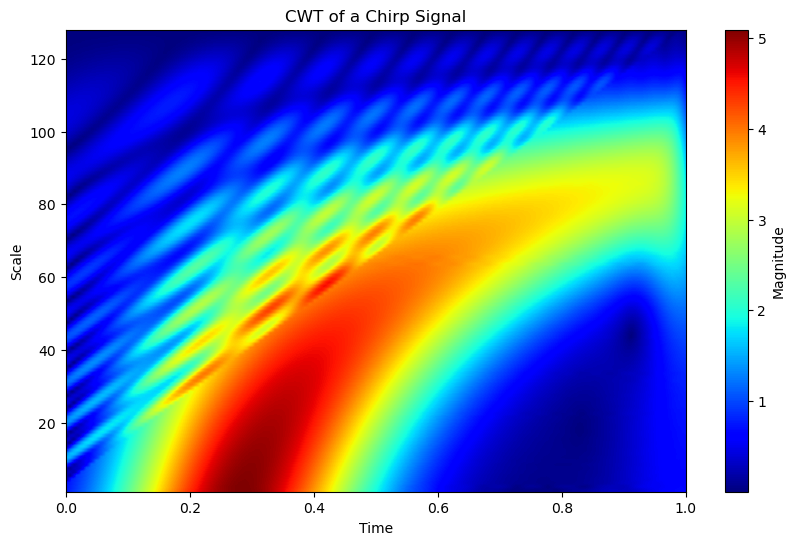

In [3]:
# Generate a chirp signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2.0 * np.pi * 7 * t * t)

# Apply CWT
coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor')

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of a Chirp Signal")
plt.show()

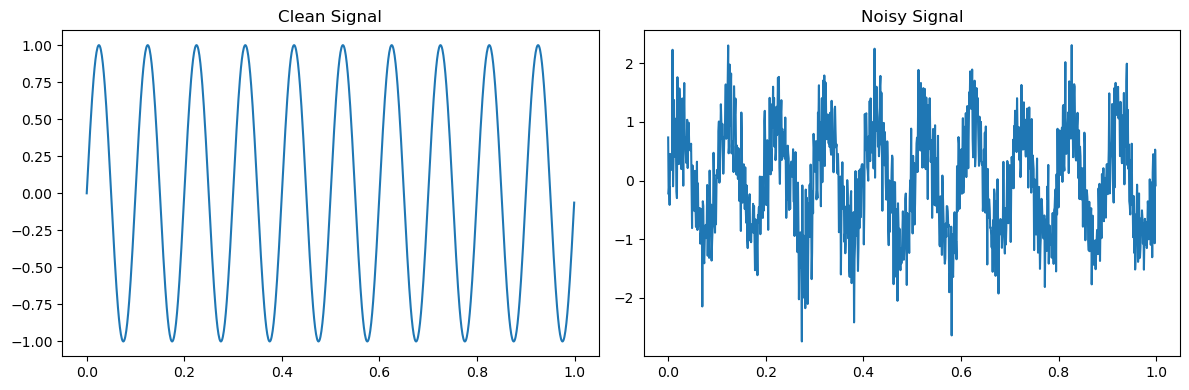

In [4]:
# Generate a simple sinusoidal signal
t = np.linspace(0, 1, 1000, endpoint=False)
clean_signal = np.sin(2.0 * np.pi * 10 * t)

# Add random noise
noise = np.random.normal(0, 0.5, clean_signal.shape)
noisy_signal = clean_signal + noise

# Plotting the clean and noisy signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, clean_signal)
plt.title("Clean Signal")
plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.tight_layout()
plt.show()

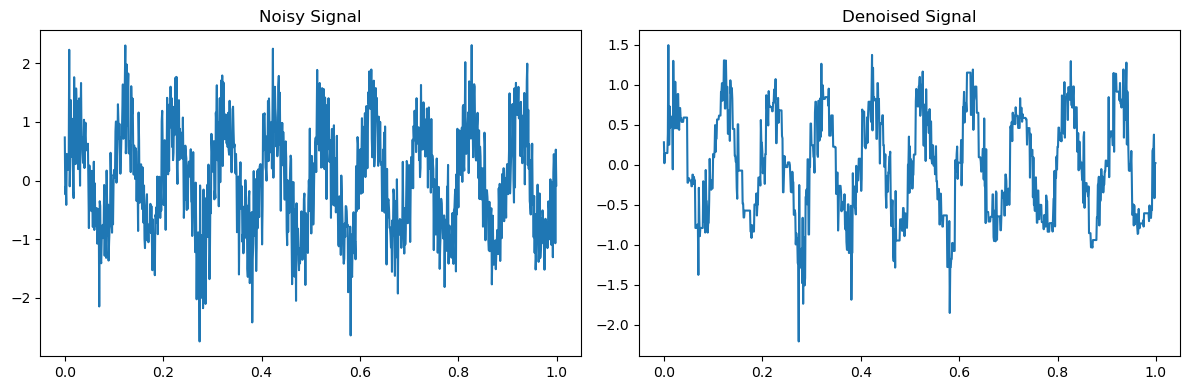

In [5]:
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, 'db1', level=4)

# Set a threshold to nullify smaller coefficients (assumed to be noise)
threshold = 0.5
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs_thresholded, 'db1')

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.tight_layout()
plt.show()

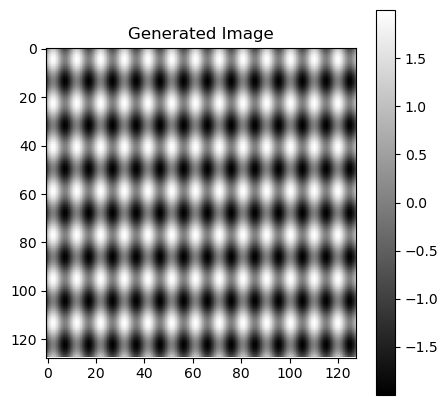

In [6]:
# Generate a simple 2D image
x, y = np.mgrid[0:1:128j, 0:1:128j]
img = np.sin(2.0 * np.pi * 7 * x) + np.sin(2.0 * np.pi * 13 * y)

# Plotting the generated image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Generated Image")
plt.colorbar()
plt.show()

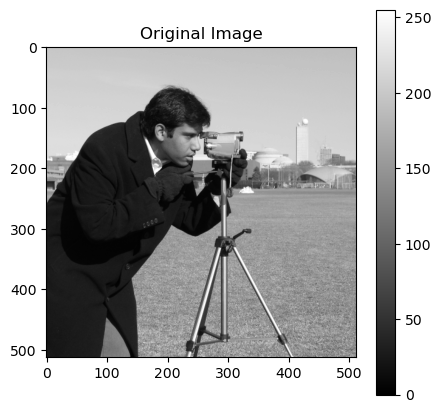

In [7]:
from skimage import data

# Use a built-in image from scikit-image as an example
img_photo = data.camera()

# Plotting the original image
plt.figure(figsize=(5, 5))
plt.imshow(img_photo, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()

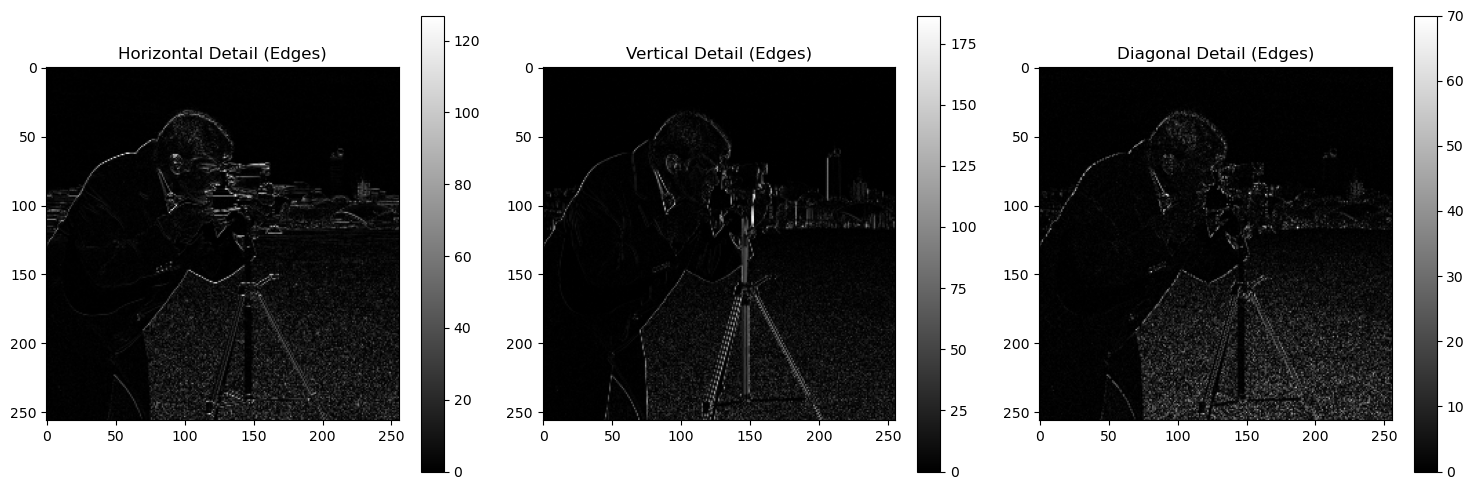

In [8]:
# Perform a 2D wavelet decomposition on the image
coeffs_photo = pywt.wavedec2(img_photo, 'db1', level=1)
cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo

# Plotting the detail coefficients (edges)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(cH_photo), cmap='gray')
plt.title("Horizontal Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.abs(cV_photo), cmap='gray')
plt.title("Vertical Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(cD_photo), cmap='gray')
plt.title("Diagonal Detail (Edges)")
plt.colorbar()
plt.tight_layout()
plt.show()